# Сравнение музыкальных предподчтений жителей Санкт-Петербурга и Москвы

**Цель исследования** — проверить три гипотезы:
1. Активность пользователей зависит от дня недели. Причём в Москве и Петербурге это проявляется по-разному.
2. В понедельник утром в Москве преобладают одни жанры, а в Петербурге — другие. Так же и вечером пятницы преобладают разные жанры — в зависимости от города. 
3. Москва и Петербург предпочитают разные жанры музыки. В Москве чаще слушают поп-музыку, в Петербурге — русский рэп.

**Ход исследования**

Данные о поведении пользователей хранятся в файле формата csv. О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных. 

## 1.Обзор данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/yandex_music_project.csv')

In [3]:
df.head(10)

,userID,Track,artist,genre,City,time,Day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Saint-Petersburg,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Moscow,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Saint-Petersburg,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Saint-Petersburg,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Moscow,08:34:34,Monday
5,842029A1,Преданная,IMPERVTOR,rusrap,Saint-Petersburg,13:09:41,Friday
6,4CB90AA5,True,Roman Messer,dance,Moscow,13:00:07,Wednesday
7,F03E1C1F,Feeling This Way,Polina Griffith,dance,Moscow,20:47:49,Wednesday
8,8FA1D3BE,И вновь продолжается бой,NaN,ruspop,Moscow,09:17:40,Friday
9,E772D5C0,Pessimist,NaN,dance,Saint-Petersburg,21:20:49,Wednesday


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0     userID  65079 non-null  object
 1   Track     63848 non-null  object
 2   artist    57876 non-null  object
 3   genre     63881 non-null  object
 4     City    65079 non-null  object
 5   time      65079 non-null  object
 6   Day       65079 non-null  object
dtypes: object(7)
memory usage: 3.5+ MB


Итак, в таблице семь столбцов. Тип данных во всех столбцах — `object`.

Согласно документации к данным:
* `userID` — идентификатор пользователя;
* `Track` — название трека;  
* `artist` — имя исполнителя;
* `genre` — название жанра;
* `City` — город пользователя;
* `time` — время начала прослушивания;
* `Day` — день недели.

В названиях колонок видны три нарушения стиля:
1. Строчные буквы сочетаются с прописными.
2. Встречаются пробелы.
3. Найдите ещё одну проблему в названии колонок и опишите её в этом пункте.



Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.


**Выводы**

В каждой строке таблицы — данные о прослушанном треке. Часть колонок описывает саму композицию: название, исполнителя и жанр. Остальные данные рассказывают о пользователе: из какого он города, когда он слушал музыку. 

Предварительно можно утверждать, что, данных достаточно для проверки гипотез. Но встречаются пропуски в данных, а в названиях колонок — расхождения с хорошим стилем.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## 2.Предобработка данных

### 2.1. Стиль заголовков

In [5]:
df.columns

Index(['  userID', 'Track', 'artist', 'genre', '  City  ', 'time', 'Day'], dtype='object')

In [6]:
df.rename(columns={'  userID':'user_id', 'Track':'track','  City  ':'city', 'Day':'day'}, inplace=True)

In [7]:
df.columns

Index(['user_id', 'track', 'artist', 'genre', 'city', 'time', 'day'], dtype='object')

### 2.2. Пропуски значений

In [8]:
df.isna().sum()

user_id       0
track      1231
artist     7203
genre      1198
city          0
time          0
day           0
dtype: int64

Не все пропущенные значения влияют на исследование. Так в `track` и `artist` пропуски не важны в рамках проекта. Достаточно заменить их явными обозначениями.Заменим пропущенные значения в столбцах `track`, `artist` и `genre` на строку `'unknown'`

In [9]:
columns_to_replace = [df['track'], df['artist'], df['genre']]
for column in columns_to_replace:
    column.fillna('unknown', inplace=True)

In [10]:
df.isna().sum()

user_id    0
track      0
artist     0
genre      0
city       0
time       0
day        0
dtype: int64

### 2.3. Дубликаты

In [11]:
df.duplicated().sum()

3826

In [12]:
df.duplicated().sum()

3826

In [13]:
print(sorted(df['genre'].unique()))

['acid', 'acoustic', 'action', 'adult', 'africa', 'afrikaans', 'alternative', 'alternativepunk', 'ambient', 'americana', 'animated', 'anime', 'arabesk', 'arabic', 'arena', 'argentinetango', 'art', 'audiobook', 'author', 'avantgarde', 'axé', 'baile', 'balkan', 'beats', 'bigroom', 'black', 'bluegrass', 'blues', 'bollywood', 'bossa', 'brazilian', 'breakbeat', 'breaks', 'broadway', 'cantautori', 'cantopop', 'canzone', 'caribbean', 'caucasian', 'celtic', 'chamber', 'chanson', 'children', 'chill', 'chinese', 'choral', 'christian', 'christmas', 'classical', 'classicmetal', 'club', 'colombian', 'comedy', 'conjazz', 'contemporary', 'country', 'cuban', 'dance', 'dancehall', 'dancepop', 'dark', 'death', 'deep', 'deutschrock', 'deutschspr', 'dirty', 'disco', 'dnb', 'documentary', 'downbeat', 'downtempo', 'drum', 'dub', 'dubstep', 'eastern', 'easy', 'electronic', 'electropop', 'emo', 'entehno', 'epicmetal', 'estrada', 'ethnic', 'eurofolk', 'european', 'experimental', 'extrememetal', 'fado', 'fairyt

In [14]:
def replace_wrong_genres(wrong_genres, correct_genre): # Функция для замены неявных дубликатов
    for wrong_genre in wrong_genres:
        df['genre'] =  df['genre'].replace(wrong_genres, correct_genre)       

In [15]:
replace_wrong_genres(['hip', 'hop', 'hip-hop'], 'hiphop')

**Выводы**

Предобработка обнаружила три проблемы в данных:

- нарушения в стиле заголовков,
- пропущенные значения,
- дубликаты — явные и неявные.

## 3.Проверка гипотез

### 3.1.Сравнение поведения пользователей 

In [16]:
groupby_city = df.groupby('city')['user_id'].count() # Оценка кол-ва пользователей в исследуемых городах
print(groupby_city)

city
Moscow              45360
Saint-Petersburg    19719
Name: user_id, dtype: int64


In [17]:
groupby_day = df.groupby('day')['user_id'].count() # Оценка кол-ва пользователей для дней недели
print(groupby_day)

day
Friday       23149
Monday       22697
Wednesday    19233
Name: user_id, dtype: int64


In [18]:
def number_tracks(day, city):   # Функция, которая считает прослушивания для заданного дня и города
    track_list = df[df['day'] == day] 
    track_list = track_list[track_list['city'] == city] 
    track_list_count = track_list['user_id'].count() 
                                                     
    return track_list_count 


In [19]:
number_tracks('Monday', 'Moscow') # количество прослушиваний в Москве по понедельникам

16715

In [20]:
number_tracks('Monday', 'Saint-Petersburg') # количество прослушиваний в Санкт-Петербурге по понедельникам

5982

In [21]:
number_tracks('Wednesday', 'Moscow') # количество прослушиваний в Москве по средам

11755

In [22]:
number_tracks('Wednesday', 'Saint-Petersburg')  # количество прослушиваний в Санкт-Петербурге по средам

7478

In [23]:
number_tracks('Friday', 'Moscow') # количество прослушиваний в Москве по пятницам

16890

In [24]:
number_tracks('Friday', 'Saint-Petersburg') # количество прослушиваний в Санкт-Петербурге по пятницам

6259

In [25]:
result = pd.DataFrame(data=[['Moscow',15740, 11056, 15945],['Saint-Petersburg', 5614, 7003, 5895]], columns = ['city', 'monday', 'wednesday', 'friday']) # Таблица с результатами

In [26]:
result

,city,monday,wednesday,friday
0,Moscow,15740,11056,15945
1,Saint-Petersburg,5614,7003,5895


In [27]:
df.groupby(['city','day'], as_index=False)['user_id'].count()

,city,day,user_id
0,Moscow,Friday,16890
1,Moscow,Monday,16715
2,Moscow,Wednesday,11755
3,Saint-Petersburg,Friday,6259
4,Saint-Petersburg,Monday,5982
5,Saint-Petersburg,Wednesday,7478


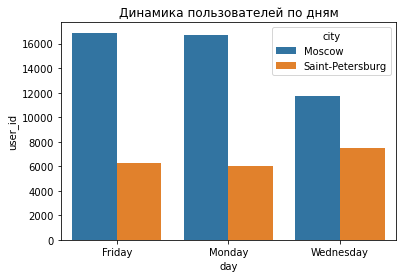

In [28]:
sns.barplot(data=df.groupby(['city','day'], as_index=False)['user_id'].count(), x='day', y='user_id', hue='city')
plt.title('Динамика пользователей по дням')
plt.show()

**Выводы**

Данные показывают разницу поведения пользователей:

- В Москве пик прослушиваний приходится на понедельник и пятницу, а в среду заметен спад.
- В Петербурге, наоборот, больше слушают музыку по средам. Активность в понедельник и пятницу здесь почти в равной мере уступает среде.

### 3.2.Музыка в начале и в конце недели

In [29]:
moscow_general = df[df['city'] == 'Moscow']
spb_general = df[df['city'] == 'Saint-Petersburg']

In [30]:
def genre_weekday(table, day, time1, time2): #Функция для отбора топ-жанров по времени и дню недели
    genre_df =  table[table['day'] == day]             
    genre_df =  genre_df[genre_df['time'] > time1]  
    genre_df =  genre_df[genre_df['time'] < time2]     
    genre_df_count = genre_df.groupby('genre')['track'].count()
    genre_df_sorted = genre_df_count.sort_values(ascending = False)
    
    return genre_df_sorted.head(10)   

In [31]:
genre_weekday(moscow_general, 'Monday', '07:00','11:00')# вызов функции для утра понедельника в Москве

genre
pop            830
dance          589
rock           511
electronic     501
hiphop         311
ruspop         203
world          190
rusrap         188
alternative    175
unknown        172
Name: track, dtype: int64

In [32]:
genre_weekday(spb_general, 'Monday', '07:00','11:00')# вызов функции для утра понедельника в Петербурге 

genre
pop            238
dance          192
rock           173
electronic     154
hiphop          88
ruspop          68
alternative     65
rusrap          56
jazz            47
classical       42
Name: track, dtype: int64

In [33]:
genre_weekday(moscow_general, 'Friday', '17:00','23:00')# вызов функции для вечера пятницы в Москве

genre
pop            761
rock           546
dance          521
electronic     510
hiphop         282
world          220
ruspop         184
alternative    176
classical      171
rusrap         151
Name: track, dtype: int64

In [34]:
genre_weekday(spb_general, 'Friday', '17:00', '23:00')# вызов функции для вечера пятницы в Петербурге

genre
pop            279
rock           230
electronic     227
dance          221
hiphop         103
alternative     67
jazz            66
rusrap          66
classical       64
world           60
Name: track, dtype: int64

**Выводы**

Если сравнить топ-10 жанров в понедельник утром, можно сделать такие выводы:

1. В Москве и Петербурге слушают похожую музыку. Единственное отличие — в московский рейтинг вошёл жанр “world”, а в петербургский — джаз и классика.

2. В Москве пропущенных значений оказалось так много, что значение `'unknown'` заняло десятое место среди самых популярных жанров. Значит, пропущенные значения занимают существенную долю в данных и угрожают достоверности исследования.

Вечер пятницы не меняет эту картину. Некоторые жанры поднимаются немного выше, другие спускаются, но в целом топ-10 остаётся тем же самым.

Таким образом, вторая гипотеза подтвердилась лишь частично:
* Пользователи слушают похожую музыку в начале недели и в конце.
* Разница между Москвой и Петербургом не слишком выражена. В Москве чаще слушают русскую популярную музыку, в Петербурге — джаз.

Однако пропуски в данных ставят под сомнение этот результат. В Москве их так много, что рейтинг топ-10 мог бы выглядеть иначе, если бы не утерянные  данные о жанрах.

### 3.3.Жанровые предпочтения в Москве и Петербурге

In [35]:
moscow_genres = moscow_general.groupby('genre')['genre'].count().sort_values(ascending = False)
print(moscow_genres.head(10)) #Москва
spb_genres = spb_general.groupby('genre')['genre'].count().sort_values(ascending = False)
print(spb_genres.head(10))#Петербург

genre
pop            6253
dance          4707
rock           4188
electronic     4010
hiphop         2215
classical      1712
world          1516
alternative    1466
ruspop         1453
rusrap         1239
Name: genre, dtype: int64
genre
pop            2597
dance          2054
rock           2004
electronic     1842
hiphop         1020
alternative     700
classical       684
rusrap          604
ruspop          565
world           553
Name: genre, dtype: int64


**Выводы**
Гипотеза частично подтвердилась:
* Поп-музыка — самый популярный жанр в Москве. Более того, в топ-10 жанров встречается близкий жанр — русская популярная музыка.
* Вопреки ожиданиям, рэп одинаково популярен в Москве и Петербурге. 


## 4. Итоги исследования

1. День недели по-разному влияет на активность пользователей в Москве и Петербурге. 
2. Музыкальные предпочтения не сильно меняются в течение недели — будь то Москва или Петербург. Небольшие различия заметны в начале недели, по понедельникам:
* в Москве слушают музыку жанра “world”,
* в Петербурге — джаз и классику.
3. Во вкусах пользователей Москвы и Петербурга больше общего чем различий. Предпочтения жанров в Петербурге напоминают московские.